## Practice on Pandas and Data Visualization

- 1. What is the overall survival rate of passengers aboard the Titanic?

In [1]:
import pandas as pd

# Load dataset
df = pd.read_csv("titanic.csv")

# Calculate overall survival rate
survival_rate = df["Survived"].mean() * 100
print(f"Overall Survival Rate: {survival_rate:.2f}%")


Overall Survival Rate: 38.38%


- 2. How does the survival rate vary by passenger class (Pclass)?

In [2]:
import pandas as pd

# Load dataset
df = pd.read_csv("titanic.csv")

# Calculate survival rate by passenger class
class_survival = df.groupby("Pclass")["Survived"].mean() * 100
print("Survival Rate by Passenger Class:")
print(class_survival)


Survival Rate by Passenger Class:
Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64


- 3. What is the average age of passengers who survived vs. those who did not survive?

In [3]:
import pandas as pd

# Load dataset
df = pd.read_csv("titanic.csv")

# Calculate average age by survival status
avg_age = df.groupby("Survived")["Age"].mean()
print("Average Age by Survival Status:")
print(avg_age)


Average Age by Survival Status:
Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64


- 4. How many passengers embarked from each port (Embarked), and what are their survival rates?

In [4]:
import pandas as pd

# Load dataset
df = pd.read_csv("titanic.csv")

# Count of passengers per embarkation port
embarked_counts = df["Embarked"].value_counts()

# Survival rate by embarkation port
embarked_survival = df.groupby("Embarked")["Survived"].mean() * 100

print("Passenger Counts by Embarked Port:")
print(embarked_counts)
print("\nSurvival Rates by Embarked Port (%):")
print(embarked_survival)


Passenger Counts by Embarked Port:
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

Survival Rates by Embarked Port (%):
Embarked
C    55.357143
Q    38.961039
S    33.695652
Name: Survived, dtype: float64


- 5. What is the distribution of fare prices paid by passengers, and does fare impact survival chances?

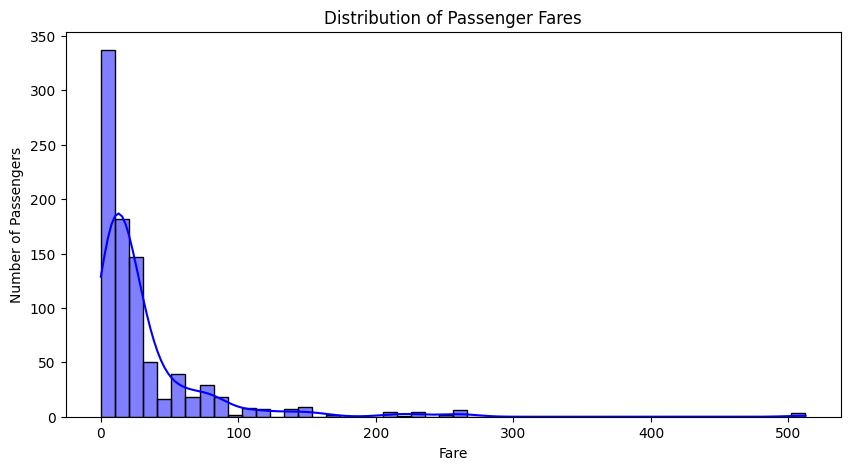

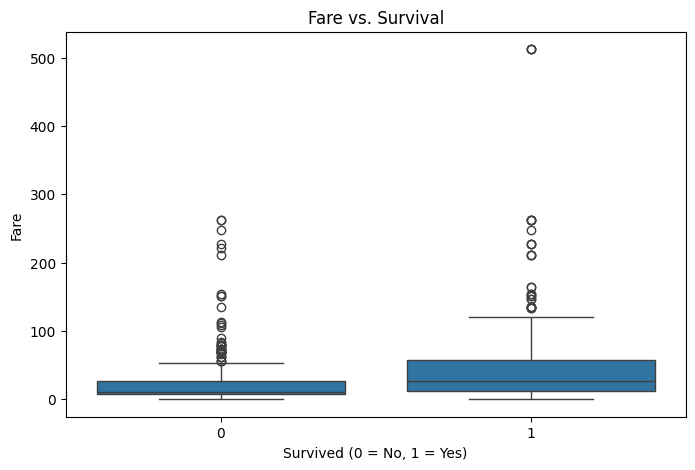

Average Fare by Survival Status:
Survived
0    22.117887
1    48.395408
Name: Fare, dtype: float64


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("titanic.csv")

# Plot fare distribution
plt.figure(figsize=(10,5))
sns.histplot(df["Fare"], bins=50, kde=True, color="blue")
plt.title("Distribution of Passenger Fares")
plt.xlabel("Fare")
plt.ylabel("Number of Passengers")
plt.show()

# Compare fares between survivors and non-survivors
plt.figure(figsize=(8,5))
sns.boxplot(x="Survived", y="Fare", data=df)
plt.title("Fare vs. Survival")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Fare")
plt.show()

# Calculate average fare by survival
avg_fare = df.groupby("Survived")["Fare"].mean()
print("Average Fare by Survival Status:")
print(avg_fare)


- 6. Plot the count of passengers by passenger class (Pclass).

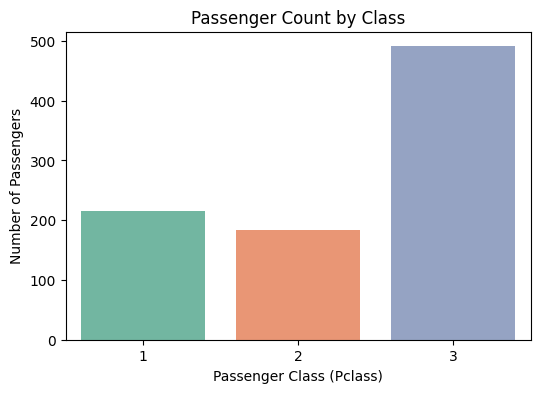

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("titanic.csv")

# Plot passenger count by class (safe for future versions)
plt.figure(figsize=(6,4))
sns.countplot(x="Pclass", data=df, hue="Pclass", palette="Set2", legend=False)
plt.title("Passenger Count by Class")
plt.xlabel("Passenger Class (Pclass)")
plt.ylabel("Number of Passengers")
plt.show()


- 7. Visualize the survival rate with respect to gender using a bar chart.

Survival Rate by Gender (%):
Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64


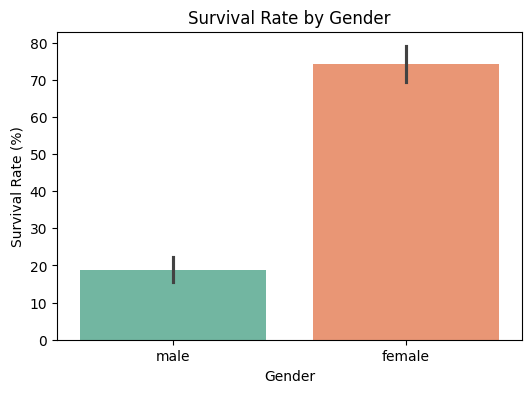

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("titanic.csv")

# Calculate survival rate by gender
gender_survival = df.groupby("Sex")["Survived"].mean() * 100
print("Survival Rate by Gender (%):")
print(gender_survival)

# Plot bar chart (future-proof, no warning)
plt.figure(figsize=(6,4))
sns.barplot(x="Sex", y="Survived", hue="Sex", data=df, 
            estimator=lambda x: sum(x)/len(x)*100, 
            palette="Set2", legend=False)
plt.title("Survival Rate by Gender")
plt.xlabel("Gender")
plt.ylabel("Survival Rate (%)")
plt.show()


- 8. Show the age distribution of passengers using a histogram or KDE plot.

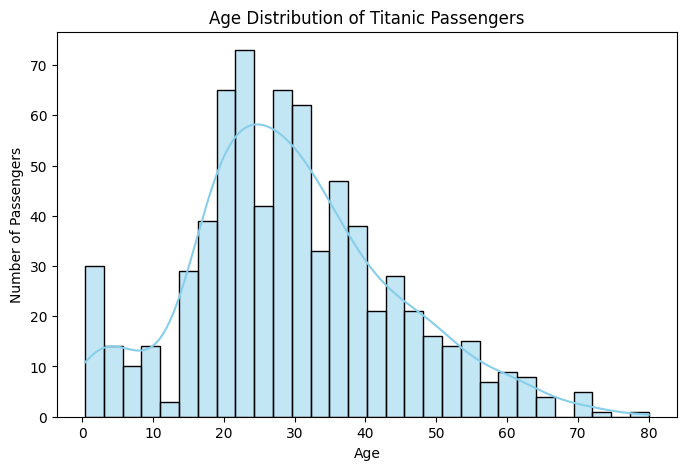

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("titanic.csv")

# Plot age distribution
plt.figure(figsize=(8,5))
sns.histplot(df["Age"].dropna(), bins=30, kde=True, color="skyblue")
plt.title("Age Distribution of Titanic Passengers")
plt.xlabel("Age")
plt.ylabel("Number of Passengers")
plt.show()


- 9. Create a boxplot comparing fares across different passenger classes.

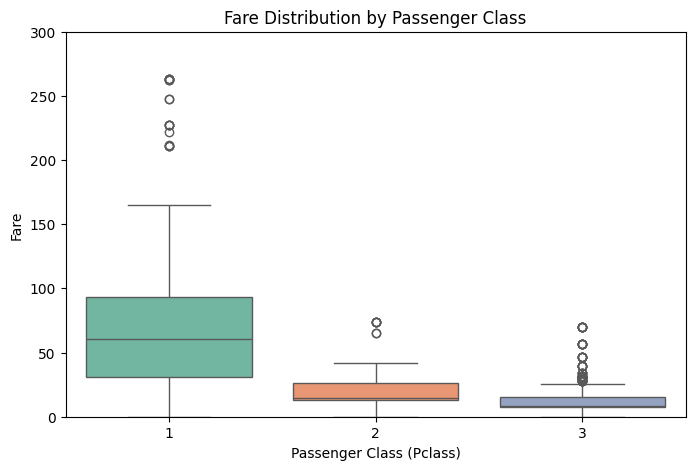

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("titanic.csv")

# Boxplot of fare vs passenger class (future-proof)
plt.figure(figsize=(8,5))
sns.boxplot(x="Pclass", y="Fare", hue="Pclass", data=df, 
            palette="Set2", legend=False)
plt.title("Fare Distribution by Passenger Class")
plt.xlabel("Passenger Class (Pclass)")
plt.ylabel("Fare")
plt.ylim(0, 300)  # limit for better visibility
plt.show()


- 10. Visualize survival count by embarkation port (Embarked) with a stacked bar chart.

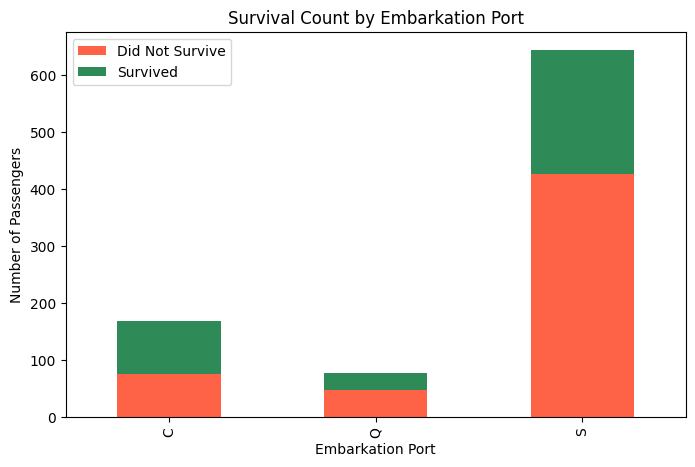

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("titanic.csv")

# Create crosstab (counts of survival by embarkation port)
embarked_survival_counts = pd.crosstab(df["Embarked"], df["Survived"])

# Plot stacked bar chart
embarked_survival_counts.plot(
    kind="bar",
    stacked=True,
    figsize=(8,5),
    color=["tomato", "seagreen"]
)

plt.title("Survival Count by Embarkation Port")
plt.xlabel("Embarkation Port")
plt.ylabel("Number of Passengers")
plt.legend(["Did Not Survive", "Survived"])
plt.show()


- 11. Display a heatmap of the correlation matrix of numerical features in the dataset.

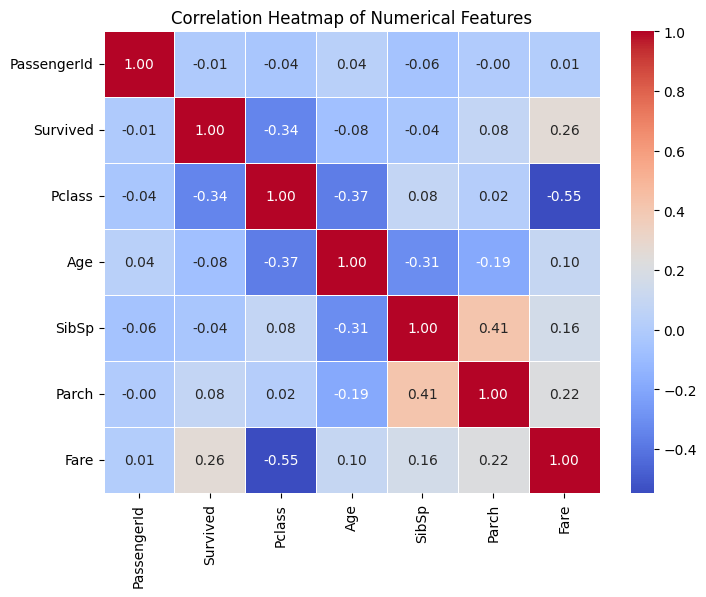

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("titanic.csv")

# Select only numerical columns
numeric_df = df.select_dtypes(include=["int64", "float64"])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()
